## Fin-Tech Challenge Problem

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import random
import xgboost as xgb
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc,recall_score,precision_score

### Reading Train and Test Data

In [2]:
train_df = pd.read_csv('Training/X_train.csv')
test_df = pd.read_csv('Test/X_test.csv')

In [3]:
train_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [4]:
train_df.shape

(33050, 44)

In [5]:
test_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,...,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [6]:
test_df.shape

(11017, 44)

**We can see here that there are 43 different features present in the dataset out of which 8 features are 
categorical and 35 features are numerical**

### Missing Data Count in Each feature

In [7]:
train_df.isnull().sum()

Unique_ID        0
C1               0
C2               0
C3               0
C4               0
C5               0
C6               0
C7               0
C8               0
N1               0
N2            4612
N3             365
N4            4606
N5            4606
N6             365
N7             427
N8               0
N9               0
N10            427
N10.1          427
N11            716
N12           4614
N14            608
N15            427
N16           4606
N17           4606
N18           4606
N19           4571
N20           4571
N21           4571
N22           4571
N23           2486
N24              0
N25          26779
N26          26779
N27          26779
N28          26779
N29          26779
N30          26779
N31          26779
N32          26830
N33              0
N34              0
N35            427
dtype: int64

**Since the columns N25 to N32 have majority of their values as NaN, we can drop them as they don't provide any useful information**

### Dropping the sparse features

In [8]:
columns = ['N25','N26','N27','N28','N29','N30','N31','N32']
train_df.drop(columns, inplace=True, axis=1)
test_df.drop(columns, inplace=True, axis=1)

In [9]:
train_df.shape

(33050, 36)

In [10]:
train_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,100.0,205.47,21.0


### Missing Value Imputation using Mean

In [11]:
columns = ['N3','N6','N7','N10','N10.1','N11','N14','N15','N35']

for column in columns:
    train_df[column].fillna(train_df[column].mean(),inplace= True)
    test_df[column].fillna(test_df[column].mean(),inplace= True)

In [12]:
train_df.isnull().sum()

Unique_ID       0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
N2           4612
N3              0
N4           4606
N5           4606
N6              0
N7              0
N8              0
N9              0
N10             0
N10.1           0
N11             0
N12          4614
N14             0
N15             0
N16          4606
N17          4606
N18          4606
N19          4571
N20          4571
N21          4571
N22          4571
N23          2486
N24             0
N33             0
N34             0
N35             0
dtype: int64

### Standardizing the Numerical Features

In [13]:
scaler_stdscaler = preprocessing.StandardScaler()
train_df[['N17','N19','N24','N33','N34','N20','N22','N35']] = \
scaler_stdscaler.fit_transform(train_df[['N17','N19','N24','N33','N34','N20','N22','N35']])

test_df[['N17','N19','N24','N33','N34','N20','N22','N35']] = \
scaler_stdscaler.transform(test_df[['N17','N19','N24','N33','N34','N20','N22','N35']])

In [14]:
train_df['N35'].head()

0   -1.038652
1   -0.354181
2   -0.217286
3    1.014763
4    0.193397
Name: N35, dtype: float64

### Finding features which have correlation greater than 0.70

In [15]:
corr_matrix = train_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features which have correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [16]:
to_drop

['N5', 'N6', 'N8', 'N11', 'N17', 'N20', 'N23', 'N34']

### Dropping highly correlated features

In [17]:
train_df.drop(train_df[to_drop],inplace=True,axis=1)
test_df.drop(test_df[to_drop],inplace=True,axis=1)

In [18]:
train_df.shape

(33050, 28)

In [19]:
train_df.isnull().sum()

Unique_ID       0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
N2           4612
N3              0
N4           4606
N7              0
N9              0
N10             0
N10.1           0
N12          4614
N14             0
N15             0
N16          4606
N18          4606
N19          4571
N21          4571
N22          4571
N24             0
N33             0
N35             0
dtype: int64

### Encoding features C6 and C8

In [20]:
train_df['C6'] = train_df['C6'].apply(lambda x: 1 if x==True else 0)
train_df['C8'] = train_df['C8'].apply(lambda x: 1 if x==True else 0)

test_df['C6'] = test_df['C6'].apply(lambda x: 1 if x==True else 0)
test_df['C8'] = test_df['C8'].apply(lambda x: 1 if x==True else 0)

### Filling Remaining Missing Values using Random Forest

In [22]:
def fill_nan_columns(df,column_name):
    rows_without_nan = df.loc[df[column_name].notnull()]
    rows_with_nan = df.loc[df[column_name].isnull()]
    
    variables = ['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8']
    variables.append(column_name)
    
    rows_without_nan = rows_without_nan[variables]
    rows_with_nan = rows_with_nan[variables]
    
    independent_var = ['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8']
    
    predictions = random_forest_model(rows_without_nan[independent_var],
                                      rows_without_nan[column_name],rows_with_nan[independent_var],column_name,df)
    
    df[column_name].fillna(predictions,inplace=True)

In [23]:
def random_forest_model(x_data,y_data,test_data,column_name,df):
    grid_search = GridSearchCV(estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = grid_search.fit(x_data, y_data)
    best_params = grid_result.best_params_
    
    rf_model = RandomForestRegressor(max_depth = best_params["max_depth"],
                                     n_estimators = best_params["n_estimators"],
                                     random_state=False, verbose=False)
    
    rf_model.fit(x_data,y_data)
    predictions = rf_model.predict(test_data)
    
    if column_name not in ['N18','N21']:
        predictions = predictions.astype(int)
    
    indices = df[column_name].index[df[column_name].apply(np.isnan)]
    
    return pd.Series(predictions,index=indices)

In [26]:
copy_train_df = train_df.copy()
copy_test_df = test_df.copy()

In [25]:
columns = ['N2','N4','N12','N16','N18','N19','N21','N22']
for column in columns:
    fill_nan_columns(train_df,column)
    fill_nan_columns(test_df,column)

### Missing Data Count in Each feature

In [27]:
train_df.isnull().sum()

Unique_ID    0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2           0
N3           0
N4           0
N7           0
N9           0
N10          0
N10.1        0
N12          0
N14          0
N15          0
N16          0
N18          0
N19          0
N21          0
N22          0
N24          0
N33          0
N35          0
dtype: int64

In [28]:
train_df.head(10)

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N14,N15,N16,N18,N19,N21,N22,N24,N33,N35
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,...,4.53776,0.0,0.0,0.528119,0.000000,0.733384,0.000000,-0.529096,-0.647851,-1.038652
1,Candidate_48134,1,4,2,66,2,0,1,1,11.05,...,0.00000,0.0,0.0,0.060000,0.671991,0.880000,0.076216,0.927119,0.329251,-0.354181
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,...,10.00000,1.0,0.0,0.535282,0.000000,0.621815,0.000000,0.192332,-0.973552,-0.217286
3,Candidate_26401,1,1,16,47,1,0,4,1,17.99,...,0.00000,0.0,0.0,0.890000,-0.454899,1.000000,-0.738251,-0.422699,-0.532898,1.014763
4,Candidate_34872,1,1,13,1,1,1,6,1,27.50,...,0.00000,0.0,0.0,0.970000,-0.346428,0.960000,-0.738251,0.419448,-0.245515,0.193397
5,Candidate_29660,1,0,30,13,2,0,2,1,13.50,...,0.00000,0.0,0.0,0.620000,-0.314140,0.900000,0.890684,-0.128303,0.233457,-0.901758
6,Candidate_29517,1,0,41,0,2,1,2,1,8.50,...,0.00000,0.0,0.0,0.580000,1.257022,1.000000,0.890684,-0.028105,-0.714907,-0.080392
7,Candidate_34848,1,1,34,17,1,0,7,1,16.20,...,0.00000,0.0,0.0,0.600000,-0.464649,1.000000,0.076216,-0.495429,-0.695748,-2.270701
8,Candidate_12081,1,0,35,31,0,0,0,1,11.75,...,5.00000,1.0,0.0,0.527201,0.000000,0.780679,0.000000,-0.208462,-0.858599,-0.217286
9,Candidate_34016,1,4,17,0,2,1,4,1,10.50,...,0.00000,0.0,0.0,0.100000,-0.136876,1.000000,-0.738251,-0.328700,-1.011869,-0.764864


In [29]:
test_df.isnull().sum()

Unique_ID    0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2           0
N3           0
N4           0
N7           0
N9           0
N10          0
N10.1        0
N12          0
N14          0
N15          0
N16          0
N18          0
N19          0
N21          0
N22          0
N24          0
N33          0
N35          0
dtype: int64

### Reading the Target Labels

In [30]:
target_df = pd.read_csv('Training/y_train.csv')

In [31]:
target_df.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


In [32]:
target_df['Dependent_Variable'].value_counts()

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

In [33]:
train_df.drop(['Unique_ID','C1','C2','C3','C4','C5','C6','C7','C8'],axis=1).head(10)

,N1,N2,N3,N4,N7,N9,N10,N10.1,N12,N14,N15,N16,N18,N19,N21,N22,N24,N33,N35
0,23.75,73.0,2.5,8.0,10.0,0,2.0,14.0,1321.0,4.53776,0.0,0.0,0.528119,0.000000,0.733384,0.000000,-0.529096,-0.647851,-1.038652
1,11.05,22.0,3.7,16.0,19.0,72,0.0,5.0,0.0,0.00000,0.0,0.0,0.060000,0.671991,0.880000,0.076216,0.927119,0.329251,-0.354181
2,29.00,72.0,2.4,8.0,17.0,15,7.0,3.0,1563.0,10.00000,1.0,0.0,0.535282,0.000000,0.621815,0.000000,0.192332,-0.973552,-0.217286
3,17.99,1.0,3.5,4.0,6.0,190,0.0,0.0,0.0,0.00000,0.0,0.0,0.890000,-0.454899,1.000000,-0.738251,-0.422699,-0.532898,1.014763
4,27.50,206.0,3.8,11.0,31.0,1504,0.0,1.0,0.0,0.00000,0.0,0.0,0.970000,-0.346428,0.960000,-0.738251,0.419448,-0.245515,0.193397
5,13.50,14.0,3.3,11.0,11.0,337,0.0,1.0,0.0,0.00000,0.0,0.0,0.620000,-0.314140,0.900000,0.890684,-0.128303,0.233457,-0.901758
6,8.50,27.0,3.6,13.0,25.0,443,0.0,3.0,0.0,0.00000,0.0,0.0,0.580000,1.257022,1.000000,0.890684,-0.028105,-0.714907,-0.080392
7,16.20,8.0,3.5,4.0,6.0,221,0.0,0.0,0.0,0.00000,0.0,0.0,0.600000,-0.464649,1.000000,0.076216,-0.495429,-0.695748,-2.270701
8,11.75,77.0,3.0,8.0,33.0,65,1.0,0.0,1299.0,5.00000,1.0,0.0,0.527201,0.000000,0.780679,0.000000,-0.208462,-0.858599,-0.217286
9,10.50,10.0,3.9,5.0,14.0,19,0.0,0.0,0.0,0.00000,0.0,0.0,0.100000,-0.136876,1.000000,-0.738251,-0.328700,-1.011869,-0.764864


In [35]:
train_df['N15'].value_counts()

0.000000     24830
1.000000      6148
2.000000      1039
0.330135       427
3.000000       335
4.000000       118
5.000000        64
6.000000        31
7.000000        20
8.000000        11
9.000000        10
10.000000        5
11.000000        3
12.000000        2
15.000000        2
22.000000        1
16.000000        1
17.000000        1
21.000000        1
30.000000        1
Name: N15, dtype: int64

### Standardizing the Remaining Numerical Features

In [36]:
scaler_stdscaler = preprocessing.StandardScaler()

train_df[['N1','N2','N3','N4','N7','N9','N10','N12','N14','N18','N21','N10.1','N16','N15']] = \
scaler_stdscaler.fit_transform(train_df[['N1','N2','N3','N4','N7',
                                         'N9','N10','N12','N14','N18','N21','N10.1','N16','N15']])

test_df[['N1','N2','N3','N4','N7','N9','N10','N12','N14','N18','N21','N10.1','N16','N15']] = \
scaler_stdscaler.transform(test_df[['N1','N2','N3','N4','N7','N9','N10','N12',
                                    'N14','N18','N21','N10.1','N16','N15']])

In [37]:
train_df.drop(['Unique_ID','C1','C2','C3','C4','C5','C6','C7','C8'],axis=1).head(10)

,N1,N2,N3,N4,N7,N9,N10,N10.1,N12,N14,N15,N16,N18,N19,N21,N22,N24,N33,N35
0,0.465243,-0.095540,-2.102372,-0.292106,-1.073882,-0.720096,0.418862,3.793764,0.038892,0.000000,-0.415822,-0.122604,-0.000901,0.000000,-0.620098,0.000000,-0.529096,-0.647851,-1.038652
1,-1.100580,-0.736012,0.833353,1.239469,-0.439280,-0.560854,-0.345054,0.937958,-0.172309,-0.431664,-0.415822,-0.122604,-1.442084,0.671991,0.240672,0.076216,0.927119,0.329251,-0.354181
2,1.112533,-0.108099,-2.347015,-0.292106,-0.580303,-0.686920,2.328653,0.303335,0.077583,0.519607,0.843729,-0.122604,0.021149,0.000000,-1.275113,0.000000,0.192332,-0.973552,-0.217286
3,-0.244926,-0.999736,0.344066,-1.057893,-1.355928,-0.299874,-0.345054,-0.648601,-0.172309,-0.431664,-0.415822,-0.122604,1.113208,-0.454899,0.945183,-0.738251,-0.422699,-0.532898,1.014763
4,0.927593,1.574709,1.077997,0.282235,0.406855,2.606289,-0.345054,-0.331289,-0.172309,-0.431664,-0.415822,-0.122604,1.359502,-0.346428,0.710346,-0.738251,0.419448,-0.245515,0.193397
5,-0.798512,-0.836478,-0.145222,0.282235,-1.003371,0.025245,-0.345054,-0.331289,-0.172309,-0.431664,-0.415822,-0.122604,0.281969,-0.314140,0.358091,0.890684,-0.128303,0.233457,-0.901758
6,-1.414978,-0.673221,0.588709,0.665129,-0.016213,0.259684,-0.345054,0.303335,-0.172309,-0.431664,-0.415822,-0.122604,0.158822,1.257022,0.945183,0.890684,-0.028105,-0.714907,-0.080392
7,-0.465620,-0.911828,0.344066,-1.057893,-1.355928,-0.231312,-0.345054,-0.648601,-0.172309,-0.431664,-0.415822,-0.122604,0.220396,-0.464649,0.945183,0.076216,-0.495429,-0.695748,-2.270701
8,-1.014275,-0.045307,-0.879153,-0.292106,0.547878,-0.576336,0.036904,-0.648601,0.035375,0.043972,0.843729,-0.122604,-0.003729,0.000000,-0.342436,0.000000,-0.208462,-0.858599,-0.217286
9,-1.168392,-0.886711,1.322640,-0.866446,-0.791837,-0.678074,-0.345054,-0.648601,-0.172309,-0.431664,-0.415822,-0.122604,-1.318937,-0.136876,0.945183,-0.738251,-0.328700,-1.011869,-0.764864


### Feature Selection using Extra Trees Classifier to get the most important features

/Users/sriramthotapallim/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sriramthotapallim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.01162976 0.03341292 0.04543626 0.04195903 0.02644421 0.01336733
 0.0298337  0.00647633 0.09957599 0.04206131 0.0606202  0.03842694
 0.04340379 0.04357952 0.0295704  0.05069087 0.02241667 0.03118523
 0.02532916 0.00487769 0.0445014  0.03587934 0.04528499 0.03196106
 0.04666437 0.05158588 0.04382565]


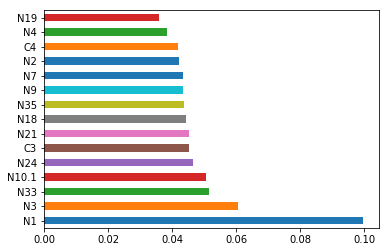

In [38]:
X_data = train_df.drop(['Unique_ID'],axis=1)  
y_data = target_df.drop(['Unique_ID'],axis=1)   
tree_model = ExtraTreesClassifier()
tree_model.fit(X_data,y_data)
print(tree_model.feature_importances_)

# Graph of feature importances.
feat_importances = pd.Series(tree_model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [41]:
train_df['Target'] = target_df['Dependent_Variable']

### Choosing the top 9 Numerical features and 6 Categorical features for model building

In [198]:
data = train_df[['N1','N3','N33','N10.1','N24',
                 'C3','N21','N35','N9','N18','C2','C1','C4','C5','C6','Target']]


train, test = train_test_split(data, test_size=0.2, random_state=random.seed(42))

In [199]:
train.head()

,N1,N3,N33,N10.1,N24,C3,N21,N35,N9,N18,C2,C1,C4,C5,C6,Target
17957,-1.847737,1.567284,-0.532898,0.620646,0.539686,7,0.945183,0.056503,-0.054376,-1.288150,1,3,41,1,1,0
27285,-0.804677,0.588709,1.670371,-0.648601,0.259130,2,0.945183,-0.080392,1.776905,0.035676,3,1,1,2,0,0
23003,1.112533,-1.613084,0.712428,0.620646,-0.208462,19,-0.009723,-0.354181,0.089384,-0.083812,0,1,1,0,1,1
12053,-1.291685,-2.591659,-1.011869,-0.331289,-0.141663,22,-0.436814,-0.627969,-0.720096,0.006206,0,1,31,0,0,1
2244,-1.402649,1.567284,1.095605,-0.648601,0.529946,1,-0.397703,2.109918,0.115924,0.014975,0,1,1,0,1,0


### Training the data using XGBoost Model

### Parameters for the XGBoost Model

In [200]:
eta = 0.1
max_depth= 6
colsample_bytree = 1
min_chil_weight=1
subsample = 1

params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": eta,
        "tree_method": 'exact',
        "max_depth": max_depth,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "min_chil_weight":min_chil_weight,
        "seed": 42,
        "subsample":subsample
    }
num_boost_round = 500
early_stopping_rounds = 40
test_size = 0.2

### Splitting the Training data into train and validation set

In [201]:
x_train, x_validation = train_test_split(train, test_size=test_size, random_state=random.seed(42))

In [202]:
features = ['N1','N3','N33','N10.1','N24',
                 'C3','N21','N35','N9','N18','C2','C1','C4','C5','C6']

target = 'Target'

In [203]:
x_train.head()

,N1,N3,N33,N10.1,N24,C3,N21,N35,N9,N18,C2,C1,C4,C5,C6,Target
21476,0.496067,-0.634509,-0.724487,2.841829,0.165612,17,-0.757385,2.246812,0.536145,1.451862,0,1,16,2,1,1
22354,1.329529,-0.389866,-1.011869,0.303335,-0.549991,2,-0.229002,-0.627969,-0.720096,-1.626804,5,1,34,2,0,0
1304,-1.459364,1.811928,-0.628501,-0.648601,0.192332,5,0.945183,0.056503,-0.605088,-0.980284,0,1,44,6,1,0
28941,-0.767689,-0.879153,-0.360468,0.303335,-0.306001,0,0.592928,-0.901758,-0.419306,1.390288,0,1,0,2,0,0
11621,-0.491512,-0.145222,0.137662,-0.648601,0.486246,19,-0.816094,-0.627969,-0.649322,-0.302978,6,1,41,1,0,0


### Creating the Data Matrix for XGBoost model

In [204]:
y_train = x_train[target]
y_valid = x_validation[target]

data_matrix_train = xgb.DMatrix(x_train[features], y_train)
data_matrix_valid = xgb.DMatrix(x_validation[features], y_valid)

watchlist = [(data_matrix_train, 'train'), (data_matrix_valid, 'eval')]

### Training the model

In [205]:
xgb_model = xgb.train(params, data_matrix_train, num_boost_round, evals=watchlist, 
                early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

[0]	train-auc:0.739058	eval-auc:0.722485
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 40 rounds.
[1]	train-auc:0.746905	eval-auc:0.728467
[2]	train-auc:0.750469	eval-auc:0.727888
[3]	train-auc:0.753022	eval-auc:0.73056
[4]	train-auc:0.75696	eval-auc:0.734183
[5]	train-auc:0.760753	eval-auc:0.736625
[6]	train-auc:0.763493	eval-auc:0.737373
[7]	train-auc:0.765396	eval-auc:0.737273
[8]	train-auc:0.766383	eval-auc:0.737733
[9]	train-auc:0.768767	eval-auc:0.738311
[10]	train-auc:0.770559	eval-auc:0.738968
[11]	train-auc:0.773198	eval-auc:0.740405
[12]	train-auc:0.774331	eval-auc:0.741063
[13]	train-auc:0.776714	eval-auc:0.743042
[14]	train-auc:0.778977	eval-auc:0.74413
[15]	train-auc:0.78121	eval-auc:0.745135
[16]	train-auc:0.78229	eval-auc:0.745797
[17]	train-auc:0.783503	eval-auc:0.746716
[18]	train-auc:0.785056	eval-auc:0.747467
[19]	train-auc:0.785937	eval-auc:0.748422
[20]	train-auc:0.788013	eval-auc:0

In [206]:
predictions = xgb_model.predict(xgb.DMatrix(x_validation[features]), ntree_limit=xgb_model.best_iteration+1)

### Average precision score in Validation set

In [207]:
avg_score = average_precision_score(x_validation[target].values, predictions)
print('Area under the precision-recall curve is: {:.2f}'.format(avg_score))

Area under the precision-recall curve is: 0.59


### Average precision score in Test set

In [209]:
test_prediction = xgb_model.predict(xgb.DMatrix(test[features]), ntree_limit=xgb_model.best_iteration+1)
avg_precision_score = average_precision_score(test[target].values, test_prediction)

print('Area under the precision-recall curve in test set is: {:.2f}'.format(avg_precision_score))

Area under the precision-recall curve in test set is: 0.57


### ROC - AUC Score for Validation Set

In [210]:
fpr, tpr, _ = roc_curve(x_validation[target].values, predictions)
roc_auc_score = auc(fpr, tpr)

In [211]:
roc_auc_score

0.7623134027374113

### Plot of ROC Curve

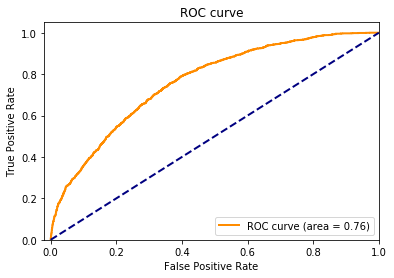

In [212]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Model Prediction on Test Data

In [213]:
test_prediction = xgb_model.predict(xgb.DMatrix(test_df[features]), 
                                    ntree_limit=xgb_model.best_iteration+1)

In [214]:
test_prediction

array([0.25099424, 0.4100367 , 0.4430695 , ..., 0.3728481 , 0.1796683 ,
       0.24191403], dtype=float32)

In [215]:
test_prediction.shape

(11017,)